# 1. Simple Linear regression from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize 

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

### Define x and y data

In [2]:
x = np.array([6, 7, 6.5, 8, 6.6, 8.1, 6.8, 6.9, 7.3, 6.9, 8.2, 7.2, 7.3, 6.9, 8.6, 7.4, 7.6, 6.8, 8, 7.4, 6.5])
y = np.array([53, 60, 56, 79, 58, 85, 70, 56, 69, 76, 79, 68, 74, 72, 84, 78, 76, 65, 92, 80, 65])

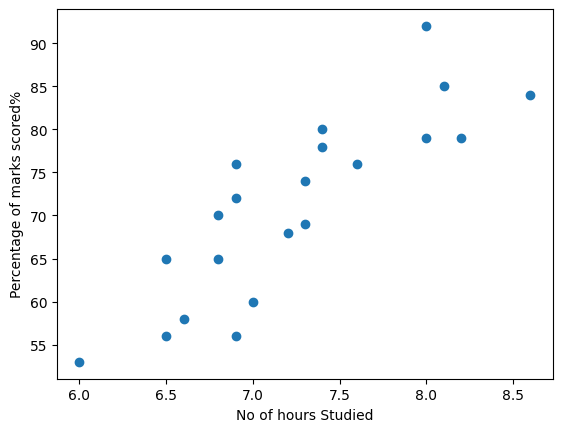

In [3]:
plt.ylabel("Percentage of marks scored%")
plt.xlabel("No of hours Studied")
plt.scatter(x, y, label="Data Points")

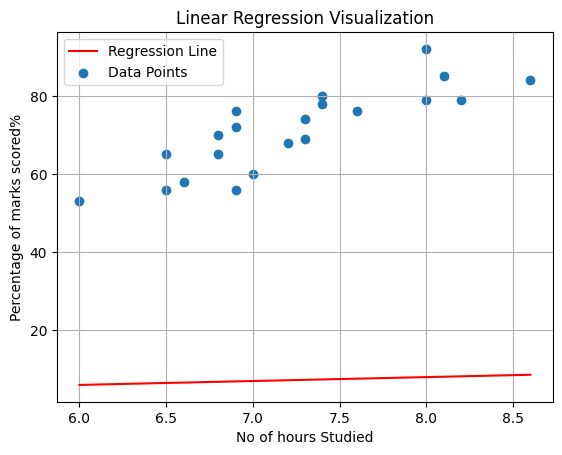

In [4]:
# defining model parameters
slope = 1
intercept = 0
def my_plot(slope,intercept,x,y):
    x_line = np.linspace(min(x), max(x), 100)  # Creates 100 points between min and max x
    # Calculate corresponding y-values for the line
    y_line = (slope * x_line) + intercept
    plt.plot(x_line, y_line, color='red', label="Regression Line")
    plt.scatter(x, y, label="Data Points")
    plt.ylabel("Percentage of marks scored%")
    plt.xlabel("No of hours Studied")
    plt.title("Linear Regression Visualization")
    plt.legend()  # Show the legend to distinguish data and line
    plt.grid(True)  # Add a grid for better readability (optional)
    plt.show()
my_plot(slope,intercept,x,y)

In [5]:
def gradient_descent(slope,intercept,x,y,lr,iterations):
    n = len(x)
    for _ in range(iterations):
        y_pred = slope * x + intercept
        slope_grad = (-2) * np.sum(x * (y-y_pred))/ n
        int_grad = (-2) * np.sum(y-y_pred) / n
        slope = slope - lr * slope_grad
        intercept = intercept - lr * int_grad
        
    return slope,intercept

In [6]:
learning_rate = 0.01 
iterations = 1000 

In [7]:
new_slope,new_intercept = gradient_descent(slope,intercept,x,y,learning_rate,iterations)

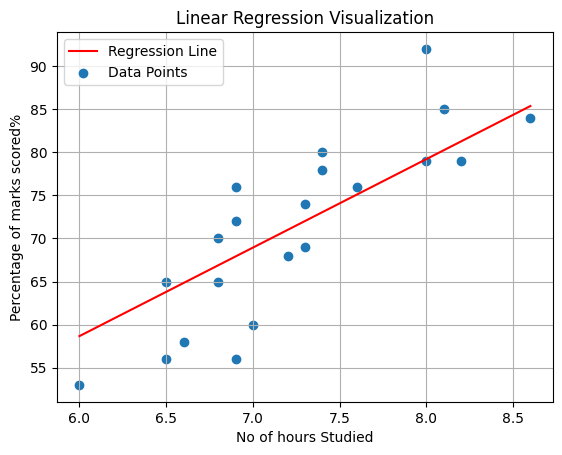

In [8]:
my_plot(new_slope,new_intercept,x,y)

# 2. Multiple Linear regression from scratch

Shape of X: (8, 2)
Shape of y: (8,)


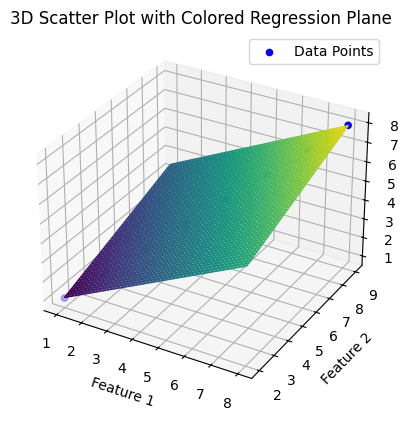

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize 


X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])  


# Define the MLR function
def MLR(X, y, lr=0.01, iterations=1000):
    n_samples, n_features = X.shape 
    weights = np.zeros(n_features)  # Initialize weights to 0
    bias = 0  # Initialize bias to 0

    for i in range(iterations):
        y_pred = np.dot(X, weights) + bias  
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # Gradient for weights
        db = (1 / n_samples) * np.sum(y_pred - y)          # Gradient for bias
        weights -= lr * dw  # Update weights
        bias -= lr * db     # Update bias

    return weights, bias

# Train the model
weights, bias = MLR(X, y, lr=0.01, iterations=1000)

# Create a meshgrid for plotting the regression plane
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Calculate predictions for the meshgrid
Y_pred = weights[0] * X1 + weights[1] * X2 + bias

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='b', label='Data Points')  # Original data points

# Normalize the predicted values for colormap
norm = Normalize(vmin=Y_pred.min(), vmax=Y_pred.max())  # Define normalization
colors = plt.cm.viridis(norm(Y_pred))  # Using the 'viridis' colormap

# Plot the regression plane with colors
ax.plot_surface(X1, X2, Y_pred, facecolors=colors, alpha=0.5)

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Variable (y)')
plt.title('3D Scatter Plot with Colored Regression Plane')
plt.legend()
plt.show()